In [40]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
matplotlib.rcParams["xtick.labelsize"] = 18
matplotlib.rcParams["ytick.labelsize"] = 18
# matplotlib.rcParams["image.cmap"] = "Purples"
matplotlib.rcParams["image.cmap"] = "inferno"
matplotlib.rcParams["axes.titlesize"] = 18
matplotlib.rcParams["axes.labelsize"] = 18
import matplotlib.pyplot as plt
import scipy.linalg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import qutip
import pulse
import pulseDyn
import pulseQuTip
import treeState
import CZGateError

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
testNum1 = 31
testStep1 = (-2 + 6)/(testNum1 - 1)
errorInd1 = np.linspace(0, testNum1 - 1, testNum1)
errorProb1 = 10**(-6 + errorInd1*testStep1)
#testStep1 = (0.02 - 0)/(testNum1 - 1)
#errorProb1 = errorInd1*testStep1

coherenceTimeStep1 = (7 - 1.25)/(testNum1 - 1)
tOvertph1 = 10**(1.25 + coherenceTimeStep1*errorInd1)
fidelityRecord0Coh = []

In [125]:
# Tree {3,1}
photonDim = 2
photonNum1 = 7
thisTree1 = treeState.tree(photonNum1, photonDim)
thisTree1.entangle(1, 4)
thisTree1.entangle(2, 5)
thisTree1.entangle(3, 6)
thisTree1.entangle(4, 7)
thisTree1.entangle(5, 7)
thisTree1.entangle(6, 7)
idealTree1 = thisTree1.getStateVec()
    
fidelityRecord4Green = []
fidelityRecord4Red = []
fidelityRecord4Blue = []
fidelityRecord4Coh = []

for ii in range(testNum1):
    # green
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(3, 1)
    denMat1.EGate(4)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.EGate(6)
    denMat1.CZGate(6, 4)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord4Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(3, 1)
    denMat1.EGate(4)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.EGate(6)
    denMat1.CZGate(6, 4)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord4Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(3, 1)
    denMat1.EGate(4)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.EGate(6)
    denMat1.CZGate(6, 4)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord4Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(3, 1)
    denMat1.EGate(4)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.EGate(6)
    denMat1.CZGate(6, 4)
    denMat1.decohWhenWaiting(6, 1)
    denMat1.CZGate(6, 5)
    denMat1.decohWhenWaiting(6, 1)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord4Coh.append(np.abs(fidelity1[0][0]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


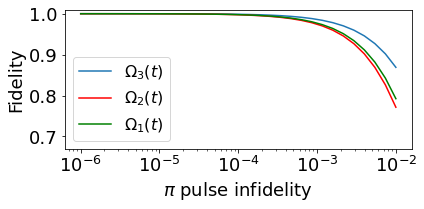

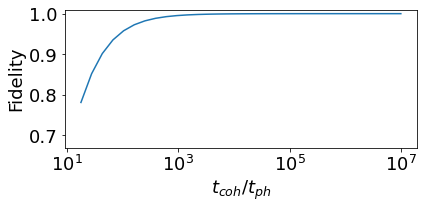

In [148]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord4Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord4Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord4Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\pi$ pulse infidelity")
plt.ylabel("Fidelity")
plt.yticks([0.7, 0.8, 0.9, 1.0])
plt.ylim(0.67, 1.01)
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4b1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord4Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity")
plt.xticks([10**(1), 10**(3), 10**(5), 10**(7)])
plt.yticks([0.7, 0.8, 0.9, 1.0])
#plt.xlim(10, 10**7)
plt.ylim(0.67, 1.01)
plt.tight_layout()
plt.savefig("s4b2.eps")

In [127]:
# Tree {2,2}
photonDim = 2
photonNum1 = 7
thisTree1 = treeState.tree(photonNum1, photonDim)
thisTree1.entangle(1, 5)
thisTree1.entangle(2, 5)
thisTree1.entangle(3, 6)
thisTree1.entangle(4, 6)
thisTree1.entangle(5, 7)
thisTree1.entangle(6, 7)
idealTree1 = thisTree1.getStateVec()
    
fidelityRecord5Green = []
fidelityRecord5Red = []
fidelityRecord5Blue = []
fidelityRecord5Coh = []

for ii in range(testNum1):
    # green
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.CZGate(4, 1)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.CZGate(5, 4)
    denMat1.EGate(6)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord5Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.CZGate(4, 1)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.CZGate(5, 4)
    denMat1.EGate(6)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord5Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.CZGate(4, 1)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.CZGate(5, 4)
    denMat1.EGate(6)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord5Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.CZGate(4, 1)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.CZGate(5, 4)
    denMat1.EGate(6)
    denMat1.CZGate(6, 5)
    denMat1.decohWhenWaiting(6, 2)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord5Coh.append(np.abs(fidelity1[0][0]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


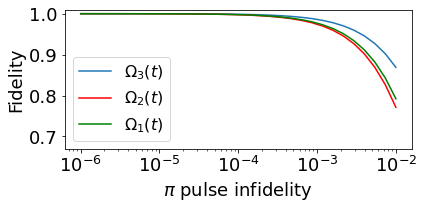

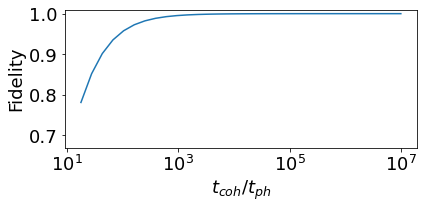

In [147]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord5Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord5Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord5Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\pi$ pulse infidelity")
plt.ylabel("Fidelity")
plt.yticks([0.7, 0.8, 0.9, 1.0])
plt.ylim(0.67, 1.01)
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4a1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord5Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity")
plt.xticks([10**(1), 10**(3), 10**(5), 10**(7)])
plt.yticks([0.7, 0.8, 0.9, 1.0])
#plt.xlim(10, 10**7)
plt.ylim(0.67, 1.01)
plt.tight_layout()
plt.savefig("s4a2.eps")

In [129]:
# Tree {2,3}
photonDim = 2
photonNum1 = 9
thisTree1 = treeState.tree(photonNum1, photonDim)
thisTree1.entangle(1, 7)
thisTree1.entangle(2, 7)
thisTree1.entangle(3, 7)
thisTree1.entangle(4, 8)
thisTree1.entangle(5, 8)
thisTree1.entangle(6, 8)
thisTree1.entangle(7, 9)
thisTree1.entangle(8, 9)
idealTree1 = thisTree1.getStateVec()
    
fidelityRecord6Green = []
fidelityRecord6Red = []
fidelityRecord6Blue = []
fidelityRecord6Coh = []

for ii in range(testNum1):
    # green
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.CZGate(6, 3)
    denMat1.EGate(7)
    denMat1.CZGate(7, 4)
    denMat1.CZGate(7, 5)
    denMat1.CZGate(7, 6)
    denMat1.EGate(8)
    denMat1.CZGate(8, 7)
    denMat1.CZGate(8, 8)
    denMat1.EGate(9)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord6Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.CZGate(6, 3)
    denMat1.EGate(7)
    denMat1.CZGate(7, 4)
    denMat1.CZGate(7, 5)
    denMat1.CZGate(7, 6)
    denMat1.EGate(8)
    denMat1.CZGate(8, 7)
    denMat1.CZGate(8, 8)
    denMat1.EGate(9)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord6Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.CZGate(6, 3)
    denMat1.EGate(7)
    denMat1.CZGate(7, 4)
    denMat1.CZGate(7, 5)
    denMat1.CZGate(7, 6)
    denMat1.EGate(8)
    denMat1.CZGate(8, 7)
    denMat1.CZGate(8, 8)
    denMat1.EGate(9)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord6Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.CZGate(6, 3)
    denMat1.EGate(7)
    denMat1.CZGate(7, 4)
    denMat1.CZGate(7, 5)
    denMat1.CZGate(7, 6)
    denMat1.EGate(8)
    denMat1.CZGate(8, 7)
    denMat1.decohWhenWaiting(8, 3)
    denMat1.CZGate(8, 8)
    denMat1.EGate(9)

    idealTreeQT = qutip.Qobj(idealTree1)
    fidelity1 = idealTreeQT.dag() * qutip.Qobj(denMat1.partialTracedRho()) * idealTreeQT
    fidelityRecord6Coh.append(np.abs(fidelity1[0][0]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


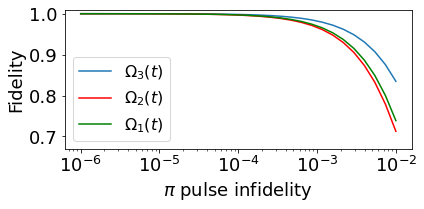

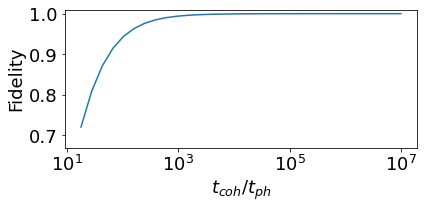

In [149]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord6Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord6Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord6Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\pi$ pulse infidelity")
plt.ylabel("Fidelity")
plt.yticks([0.7, 0.8, 0.9, 1.0])
plt.ylim(0.67, 1.01)
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4c1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord6Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity")
plt.xticks([10**(1), 10**(3), 10**(5), 10**(7)])
plt.yticks([0.7, 0.8, 0.9, 1.0])
#plt.xlim(10, 10**7)
plt.ylim(0.67, 1.01)
plt.tight_layout()
plt.savefig("s4c2.eps")

In [135]:
# Tree {3,2}
photonDim = 2
photonNum1 = 10
thisTree1 = treeState.tree(photonNum1, photonDim)
thisTree1.entangle(1, 7)
thisTree1.entangle(2, 7)
thisTree1.entangle(3, 8)
thisTree1.entangle(4, 8)
thisTree1.entangle(5, 9)
thisTree1.entangle(6, 9)
thisTree1.entangle(7, 10)
thisTree1.entangle(8, 10)
thisTree1.entangle(9, 10)
idealTree1 = thisTree1.getStateVec()
    
fidelityRecord7Green = []
fidelityRecord7Red = []
fidelityRecord7Blue = []
fidelityRecord7Coh = []

for ii in range(testNum1):
    # green
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.EGate(7)
    denMat1.CZGate(7, 3)
    denMat1.CZGate(7, 4)
    denMat1.EGate(8)
    denMat1.CZGate(8, 5)
    denMat1.CZGate(8, 6)
    denMat1.EGate(9)
    denMat1.CZGate(9, 7)
    denMat1.CZGate(9, 8)
    denMat1.CZGate(9, 9)
    denMat1.EGate(10)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord7Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.EGate(7)
    denMat1.CZGate(7, 3)
    denMat1.CZGate(7, 4)
    denMat1.EGate(8)
    denMat1.CZGate(8, 5)
    denMat1.CZGate(8, 6)
    denMat1.EGate(9)
    denMat1.CZGate(9, 7)
    denMat1.CZGate(9, 8)
    denMat1.CZGate(9, 9)
    denMat1.EGate(10)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord7Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.EGate(7)
    denMat1.CZGate(7, 3)
    denMat1.CZGate(7, 4)
    denMat1.EGate(8)
    denMat1.CZGate(8, 5)
    denMat1.CZGate(8, 6)
    denMat1.EGate(9)
    denMat1.CZGate(9, 7)
    denMat1.CZGate(9, 8)
    denMat1.CZGate(9, 9)
    denMat1.EGate(10)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord7Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulseQuTip.densityMatrix(photonNum1, 2*errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.EGate(7)
    denMat1.CZGate(7, 3)
    denMat1.CZGate(7, 4)
    denMat1.EGate(8)
    denMat1.CZGate(8, 5)
    denMat1.CZGate(8, 6)
    denMat1.EGate(9)
    denMat1.CZGate(9, 7)
    denMat1.decohWhenWaiting(9, 2)
    denMat1.CZGate(9, 8)
    denMat1.decohWhenWaiting(9, 2)
    denMat1.CZGate(9, 9)
    denMat1.EGate(10)

    idealTreeQT = qutip.Qobj(idealTree1)
    fidelity1 = idealTreeQT.dag() * qutip.Qobj(denMat1.partialTracedRho()) * idealTreeQT
    fidelityRecord7Coh.append(np.abs(fidelity1[0][0]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


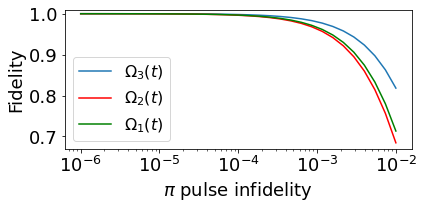

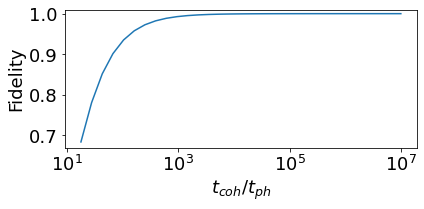

In [150]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord7Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord7Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord7Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\pi$ pulse infidelity")
plt.ylabel("Fidelity")
plt.yticks([0.7, 0.8, 0.9, 1.0])
plt.ylim(0.67, 1.01)
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4d1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord7Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity")
plt.xticks([10**(1), 10**(3), 10**(5), 10**(7)])
plt.yticks([0.7, 0.8, 0.9, 1.0])
#plt.xlim(10, 10**7)
plt.ylim(0.67, 1.01)
plt.tight_layout()
plt.savefig("s4d2.eps")

In [154]:
fidelityRecord5Coh

[0.7810400508808578,
 0.851882003951159,
 0.9015235010729048,
 0.9352785617888939,
 0.9577848249870049,
 0.9726007326118953,
 0.9822738832101371,
 0.9885558050797807,
 0.9926214016216226,
 0.9952467944267722,
 0.9969397481330016,
 0.9980304280941765,
 0.9987326803461485,
 0.9991846652819696,
 0.999475501604797,
 0.9996626150767967,
 0.999782984881307,
 0.9998604135525828,
 0.9999102179729241,
 0.9999422527928745,
 0.9999628576291988,
 0.9999761105382097,
 0.9999846346699746,
 0.9999901172766751,
 0.9999936436049913,
 0.9999959116808125,
 0.9999973704677352,
 0.9999983087333724,
 0.999998912208732,
 0.9999993003529608,
 0.9999995500001186]